In [3]:
# importing all necessary libraries

import numpy as np
import pylab as pl
import pandas as pd              # Pandas is one of those packages and makes importing and analyzing data much easier.
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

# Input data files are available in the "../input/" directory.

import os
print(os.listdir("../input/human-activity-recognition-with-smartphones")) 

# Any results written to the current directory are saved as output.

['test.csv', 'train.csv']


In [4]:
# Load the Train and Test set

train = shuffle(pd.read_csv("../input/human-activity-recognition-with-smartphones/train.csv"))  
test = shuffle(pd.read_csv("../input/human-activity-recognition-with-smartphones/test.csv"))

In [5]:
# Check for missing values in the dataset

print("Any missing sample in training set:",train.isnull().values.any())
print("Any missing sample in test set:",test.isnull().values.any(), "\n")

Any missing sample in training set: False
Any missing sample in test set: False 



In [6]:
# Analysing Frequency Distribution 

# The value_counts() function returns an object containing counts of unique values.This means it enables us to count the number of 
# unique elements in a column of a Pandas dataframe.
temp = train["Activity"].value_counts()              # contains each of the six activities value counts


# Pandas Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns.
df = pd.DataFrame({'labels': temp.index , 'values': temp.values})
print(df)
print("\n")

# Sum each column: use axis = 0
print( "sum of value counts = " , df["values"].sum(axis = 0) ) # total number of train examples


               labels  values
0              LAYING    1407
1            STANDING    1374
2             SITTING    1286
3             WALKING    1226
4    WALKING_UPSTAIRS    1073
5  WALKING_DOWNSTAIRS     986


sum of value counts =  7352


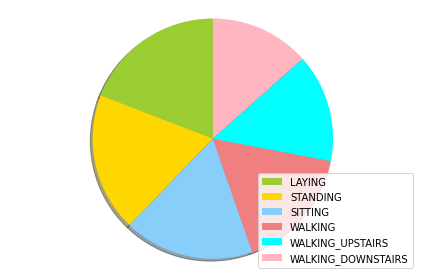

In [7]:
# Visualizing data by PIE CHART

labels = df['labels']
sizes = df['values']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','cyan','lightpink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [8]:
# processing data

# subject - An identifier of the subject who carried out the experiment.
# activity - label for one of the six activities

# Remove two columns named 'Activity' and 'subject' out of those 563 coloumns , so now 561 coloumns remain 
# and convert train which is a python dictionary into a Panda DataFrame
X_train = pd.DataFrame(train.drop(['subject', 'Activity'], axis=1)) 
# Y_train_label has outcome labels(ground truth) from train set 
Y_train_label = train.Activity.values.astype(object)                 


# Remove two columns named 'Activity' and 'subject' out of those 563 coloumns , so now 561 coloumns remain 
# and convert train which is a python dictionary into a Panda DataFrame
X_test = pd.DataFrame(test.drop(['subject', 'Activity'], axis=1))
# Y_test_label has outcome labels(ground truth) from test set 
Y_test_label = test.Activity.values.astype(object)


print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")
print("Dimension of outcome Train set",Y_train_label.shape,"\n")
print("Dimension of outcome Test set",Y_test_label.shape,"\n")



Dimension of Train set (7352, 561)
Dimension of Test set (2947, 561) 

Dimension of outcome Train set (7352,) 

Dimension of outcome Test set (2947,) 



In [13]:
# Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.

# Label encoding assigns a unique number(starting from 0) to each class of data. (0 for laying,1 for standing... so on)

# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# encoding train labels 
label_encoder.fit(Y_train_label)
Y_train = label_encoder.transform(Y_train_label)

# encoding test labels 
label_encoder.fit(Y_test_label)
Y_test = label_encoder.transform(Y_test_label)

In [14]:
# standardising datas..i.e mean=0 and variance=1

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# "fit" computes the mean and std to be used for later scaling. (just a computation), nothing is given to you. 
# "transform" uses a previously computed mean and std to autoscale the data (subtract mean from all values and then divide it by std).
# "fit_transform" does both at the same time.



In [16]:
params_grid = [ 
                {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
                {'kernel': ['linear'], 'C': [1, 10, 100, 1000]} 
                                                                    ]

# The params_grid parameter requires a list of parameters and the range of values for each parameter of the specified estimator.

# A list of values to choose from should be given to each hyper parameter of the model. You can change these values and experiment 
# more to see which value ranges give better performance.

In [18]:
# Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. 
# This is significant as the performance of the entire model is based on the hyper parameter values specified.

# GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined 
# hyperparameters and fit your estimator (model) on your training set.

# A cross validation process is performed in order to determine the hyper parameter value set which provides the best accuracy levels.

# you can specify the number of times for the cross-validation for each set of hyperparameters.  (cv=5)

# Support Vectors Classifier(SVC) tries to find the best hyperplane to separate the different classes by maximizing the distance 
# between sample points and the hyperplane.

svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled, Y_train)


KeyboardInterrupt: 

In [ ]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_

Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

In [ ]:
# Making the Confusion Matrix
 
# A Confusion matrix is a 2D matrix unlike it helps calculating exact count of activities correctly identified. 
# In other words, it describes the performance of the classification model on the set of test dataset.

print('confusion matrix for test set')
print(confusion_matrix(Y_test_label,Y_pred_label))

In [ ]:
# statistical analysis

acc_train = final_modelmodel.score(X_train_scaled , Y_train)
acc_test = final_modelmodel.score(X_test_scaled  , Y_test)

print('Training accuracy=',acc_train)
print('Testing accuracy=',acc_test)